In [9]:
using Yao
using Yao.Blocks

In [2]:
entangler(nbit::Int, offset::Int) = chain(nbit, control(nbit, i+offset, mod(i+offset, nbit)+1=>X) for i=1:2:nbit)

entangler (generic function with 1 method)

In [3]:
c = entangler(4,1)
chain(X,X)

Total: 1, DataType: Complex{Float64}
chain
├─ X gate
└─ X gate


In [7]:
function build_block(nbit::Int, theta::Real, trafie::Real)
    c = chain(nbit)
    # entanglers
    entangler_A = entangler(nbit, 0) |> cache
    entangler_B = entangler(nbit, 1) |> cache
    entangler_AB = chain(entangler_A, entangler_B) |> cache
    
    # rotations
    rz = Rz(theta)
    rx = Rx(trafie)
    rz_A = repeat(nbit, rz, 1:2:nbit) |> cache
    rz_B = repeat(nbit, rz, 2:2:nbit) |> cache
    rx_AB = repeat(nbit, rx, 1:nbit)
    
    append!(c, [entangler_A, rz_B, entangler_AB, rz_A, entangler_B, rx_AB])
end

build_block (generic function with 2 methods)

In [31]:
nbit = 10
theta = 6.2632
trafie = 0.05

unit = build_block(nbit, theta, trafie);

In [32]:
niter = 500
reg = zero_state(nbit)
res = Float64[]

for i in 1:niter
    apply!(reg, unit)
    push!(res, expect(put(nbit, nbit÷2=>Z), reg))
end

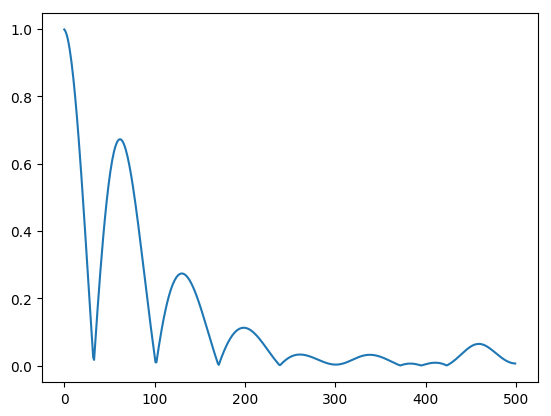

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1511ee8a9be0>

In [34]:
using PyPlot
plot(res .|> abs)